# Pendahuluan
Datasets yang akan digunakan adalah data yang berisi catatan jual beli properti di New York City selama periode 12 bulan. Datasets ini berisi lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan. Berikut adalah penjelasan mengenai beberapa bidang yang mungkin lebih sulit dipahami:

BOROUGH: Kode digit untuk borough (wilayah) tempat properti berada; secara urut ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
BLOCK; LOT: Kombinasi dari borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasanya disebut sebagai BBL.
BUILDING CLASS AT PRESENT dan BUILDING CLASS AT TIME OF SALE: Tipe bangunan pada berbagai titik waktu. Lihat glosarium yang terhubung di bawah ini.


# Import Library

In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Load Data

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


# Exploratory & Cleaning Data

In [3]:
df.drop(columns=['EASE-MENT', 'APARTMENT NUMBER'], inplace=True)
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [4]:
df.shape

(84548, 19)

In [5]:
df.loc[df['BOROUGH'] == 1, 'BOROUGH'] = 'Manhattan'
df.loc[df['BOROUGH'] == 2, 'BOROUGH'] = 'Bronx'
df.loc[df['BOROUGH'] == 3, 'BOROUGH'] = 'Brooklyn'
df.loc[df['BOROUGH'] == 4, 'BOROUGH'] = 'Queens'
df.loc[df['BOROUGH'] == 5, 'BOROUGH'] = 'Staten Island'
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [6]:
df.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [7]:
#melihat tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [8]:
df['BOROUGH'] = df['BOROUGH'].astype('string')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('string')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['ADDRESS'] = df['ADDRESS'].astype('string')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [9]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [10]:
df = df[df['GROSS SQUARE FEET'].notnull()]
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Setelah dilakukan cleaning data pada nilai null, jumlah data sekarang ada sebanyak 48244 dimana sebelumnya berjumlah 84548. sehingga data ini dapat digunakan dibandingkan data sebelumnya yang kemungkinan terdapat kesalahan penginputan data, data tercorrupt, dan sebagainya yang membuat hasil nanti menjadi tidak akurat.

# A. Mean

In [11]:
df_mean = df.pivot_table(
    index='BOROUGH', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#sename kolom 'SALE PRICE' menjadi 'MEAN SALE PRICE'
df_mean.rename(columns={'SALE PRICE':'MEAN SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'MEAN SALE PRICE'
df_mean.sort_values('MEAN SALE PRICE', ascending=False, inplace=True)

#menampilkan tabel
df_mean.head()

,MEAN SALE PRICE
BOROUGH,
Manhattan,1.851722e+07
Queens,9.123055e+05
Brooklyn,8.344884e+05
Bronx,5.901936e+05
Staten Island,5.286038e+05


# B. Median

In [12]:
df_median = df.pivot_table(
    index='ADDRESS', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#rename kolom 'SALE PRICE' menjadi 'MEDIAN SALE PRICE'
df_median.rename(columns={'SALE PRICE':'MEDIAN SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'MEDIAN SALE PRICE'
df_median.sort_values('MEDIAN SALE PRICE', ascending=False, inplace=True)

#menampilkan tabel
df_median.head()

,MEDIAN SALE PRICE
ADDRESS,
245 PARK AVENUE,2.210000e+09
60 WALL STREET,1.040000e+09
85 BROAD STREET,6.520000e+08
460-520 2ND AVENUE,6.200000e+08
1250 BROADWAY,5.650000e+08


# C. Modus

In [13]:
staten = df[(df['BOROUGH'] == "Brooklyn")]

In [14]:
#buat pivot table dengan index 'BOROUGH', values 'BUILDING CLASS CATEGORY' dan aggfunc=stats.mode
#dimana np.mode akan menghitung nilai modus
df_mode = staten.pivot_table(
    index='BOROUGH', 
    values='BUILDING CLASS CATEGORY', 
    aggfunc=stats.mode
)

#tampilkan tabel
df_mode

c:\Users\faiza\miniconda3\envs\mbkm5\lib\site-packages\pandas\core\groupby\generic.py:285: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)
c:\Users\faiza\miniconda3\envs\mbkm5\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,BUILDING CLASS CATEGORY
BOROUGH,
Brooklyn,([02 TWO FAMILY DWELLINGS ]...


# D. Range

In [15]:
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year

In [16]:
#pilih tahun 2015
y2017 = df[(df['SALE YEAR'] == 2017)]

In [17]:
#buat pivot table dengan index 'BOROUGH', values 'SALE PRICE' dan aggfunc=np.ptp
#dimana np.ptp akan menghitung nilai range
df_range = y2017.pivot_table(
    index='BOROUGH', 
    values='SALE PRICE', 
    aggfunc=np.ptp
)

#rename kolom 'SALE PRICE' menjadi 'RANGE SALE PRICE'
df_range.rename(columns={'SALE PRICE':'RANGE SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'RANGE SALE PRICE'
df_range.sort_values('RANGE SALE PRICE', ascending=False, inplace=True)

df_range.head()

,RANGE SALE PRICE
BOROUGH,
Manhattan,2.210000e+09
Brooklyn,1.600000e+08
Queens,1.398749e+08
Bronx,8.637500e+07
Staten Island,1.190000e+07


# E. Variance

In [18]:
df_variance = df

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_variance['SALE YEAR'] = pd.DatetimeIndex(df_variance['SALE DATE']).year

#buat pivot table dengan index 'SALE YEAR'', values 'SALE PRICE' dan aggfunc=statistics.variance
#dimana statistics.variance akan menghitung ilai variance dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_variance = df.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.variance
)

#rename kolom 'SALE PRICE' menjadi ' VARIANCE SALE PRICE'
df_variance.rename(columns={'SALE PRICE':' VARIANCE SALE PRICE'}, inplace=True)

df_variance.head()

,VARIANCE SALE PRICE
SALE YEAR,
2016,9.569459e+13
2017,2.254478e+14


# F. Standar Deviasi

In [19]:
df_std = df

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_std['SALE YEAR'] = pd.DatetimeIndex(df_std['SALE DATE']).year

#buat pivot table dengan index 'SALE YEAR'', values 'SALE PRICE' dan aggfunc=statistics.stdev
#dimana statistics.stdev akan menghitung nilai standard deviasi dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_std = df_std.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.stdev
)

#rename kolom 'SALE PRICE' menjadi 'STD SALE PRICE'
df_std.rename(columns={'SALE PRICE':' STD SALE PRICE'}, inplace=True)

df_std.head()

,STD SALE PRICE
SALE YEAR,
2016,9.782361e+06
2017,1.501492e+07


# G. Probability Distribution

In [20]:
df_pd = df

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_pd['SALE YEAR'] = pd.DatetimeIndex(df_pd['SALE DATE']).year

#Memfilter data dimana kolom 'SALE YEAR' yang diambil harus bernilai 2017, kolom 'SALE PRICE' yang diambil harus diantara sama dengan 1000000 - 5000000
df_pd = df_pd[
    (df_pd['SALE YEAR'] == 2016) & 
    (df_pd['SALE PRICE'] >= 1000000) &
    (df_pd['SALE PRICE'] <= 6000000)
]['SALE PRICE']

In [21]:
#mencari harga tertinggi
mode = statistics.mode(df_pd)
mode

1300000.0

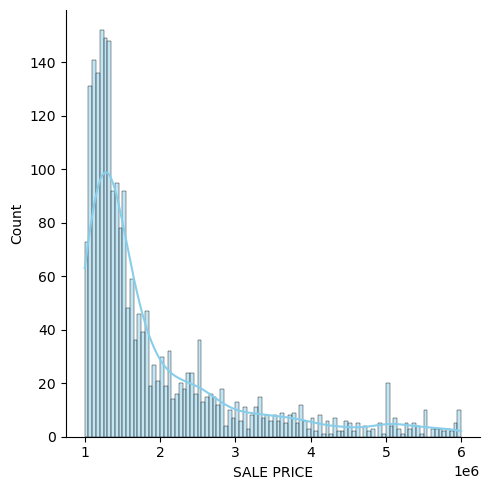

In [22]:
#grafik distribusi
ax = sns.displot(
    df_pd,
    kde=True,
    bins=100,
    color='skyblue')

# H. Confidence Intervals

In [23]:
#cari mean, standar deviasi, dan size dari 'SALE PRICE' berdasarkan 'BOROUGH'
df_ci = df.groupby('BOROUGH').agg({'SALE PRICE':[np.mean, np.std, np.size]})

In [24]:
mean = df_ci.loc['Manhattan']['SALE PRICE']['mean'] #cari nilai mean pada Manhattan
sd = df_ci.loc['Manhattan']['SALE PRICE']['std'] #cari nilai standar deviasi pada Manhattan
n = df_ci.loc['Manhattan']['SALE PRICE']['size'] #cari nilai size pada Manhattan
z = 1.96 #tingkat kepercayaan sebesar 95%

#mencari standar error
se = sd / np.sqrt(n)

#mencari CI
lcb = mean - z * se
ucb = mean + z * se
lcb,ucb

(13082977.472065415, 23951462.881811325)

# I. Hypothesis Testing

In [25]:
#pilih borough
df_manhattan = df[df['BOROUGH'] == 'Manhattan']
df_queens = df[df['BOROUGH'] == 'Queens']

#cari mean dan standar deviasi dari Manhattan
n1 = len(df_manhattan)
mu1 = df_manhattan['SALE PRICE'].mean()
sd1 = df_manhattan['SALE PRICE'].std()

#cari mean dan standar deviasi dari Queens
n2 = len(df_queens)
mu2 = df_queens['SALE PRICE'].mean()
sd2 = df_queens['SALE PRICE'].std()

 
sm.stats.ztest(df_manhattan['SALE PRICE'], df_queens['SALE PRICE'], alternative='two-sided')

(20.87458914782816, 9.114915624607499e-97)